
# Analysing Employee Exit Surveys


## Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We can access the datasets here:

1. [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

2. [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* ID: An id used to identify the participant of the survey

* SeparationType: The reason why the person's employment ended

* Cease Date: The year or month the person's employment ended

* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* Record ID: An id used to identify the participant of the survey

* Reason for ceasing employment: The reason why the person's employment ended

* LengthofServiceOverall. Overall Length of Service at Institute (in years):   The length of the person's employment (in years)

## Purpose of Analysis

The main goal of this analysis is to answer the following questions:

* Are employees who only worked for the institutes for a short period of time   resigning due to some kind of dissatisfaction? What about employees who       have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What     about older employees?

## Loading and exploring the data


In [11]:
# Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Read in the data
dete_survey = pd.read_csv('dete_survey.csv') 
tafe_survey = pd.read_csv('tafe_survey.csv')

In [12]:
#Exploring DETE 
dete_survey.info()
print('\n')
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The dete_survey dataframe has Not Stated values that are not represented as NaN.

In [13]:
#Exploring TAFE 
tafe_survey.info()
print('n')
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [14]:
# Display unique values of SeparationType
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [15]:
# Display unique values of Reason for ceasing employment
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

The code above demonstrates that in dete_survey the age retirement accounts for the majority of why employment ended, whereas in tafe_survey the resignation is the most common one. Termination is the least common in both.

In [16]:
# Determine the NaN values in DETE
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In dete_survey the following columns have the most NaN values (over 600):

* Business Unit

* Aboriginal

* Torres Strait

* South Sea

* Disability

* NESB

We would need to further determine whether these columns are essential to our analysis, and decide if we can remove them or replace the null values with different data.

Now, let's examine tafe_survey null values:

In [17]:
# Determine the NaN values in TAFE
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We can tell there are lot of null values in tafe_survey, nearly a 100 or more in each column. In addition, there are way too many columns - 72, that doesn't allow us to read the data clearly and distracts from the columns on which we need to focus in the next steps

## Identifying Missing values and Removing unwanted columns

First step, we will handle the Not Stated values by reading pandas in csv file again, but this time we will read Not Stated in as NaN:

In [18]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Now, let's drop some columns that we won't use in our analysis:

In [19]:
# Dropping columns that are unnecessary 
cols_dete = dete_survey.columns[28:49]

# Updating the dataframe
dete_survey_updated = dete_survey.drop(cols_dete, axis=1)
print(cols_dete)

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


The values in the columns we dropped in dete_survey are the aspects of the job to measure satisfaction/dissatifaction of the job.

In [20]:
# Dropping columns that are unnecessary 
cols_tafe = tafe_survey.columns[17:66] 

# Updating the dataframe
tafe_survey_updated = tafe_survey.drop(cols_tafe, axis=1)
print(cols_tafe)

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

Majority of columns we dropped in tafe_survey dataframe are the topics that indicate why an employee resigned and other information about the workplace that is not relevant to the purpose of our project.

## Cleaning Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

We will use the following columns in both datasets(that represent the same values, but have different names).

dete_survey - tafe_survey:

* ID - Record ID

* SeparationType - Reason for ceasing employment

* Cease date - CESSATION YEAR

* DETE Start Date - ...

* ... - LengthofServiceOverall.Overall Length of Service at Institute (in -      years)

* Age - CurrentAge.Current Age

* Gender - Gender.What is your Gender?

Because we eventually want to combine them, we'll have to standardize the column names.

In [21]:
# Standardize the column names 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the code above, we:

* Made all the capitalization lowercase

* Removed any trailing whitespace from the end of the strings

* Replaced spaces with underscores

The standardized column names are easier to work with, and combine with other dataframes.

In [22]:
# Renaming the columns necessary for our analysis
tafe_survey_updated.rename({'Record ID':'id',
                           'CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype', 
                           'Gender. What is your Gender?': 'gender', 
                           'CurrentAge. Current Age': 'age', 
                           'Employment Type. Employment Type': 'employment_status', 
                           'Classification. Classification': 'position', 
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1, inplace=True)

In [23]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In the code above, we mapped and renamed the existing column names in tafe_survey_updated to match those in dete_survey_updated which enables us to combine them in the next steps

## Filtering the data

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of   time resigning due to some kind of dissatisfaction? What about employees     who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [24]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [26]:
# Modifying strings in column names related to `Resignation` 
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split("-").str.get(0)

# Creating a new DETE dataframe that consist only the data of employees who resigned
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

In [27]:
# Creating a new TAFE dataframe that consist only the data of employees who resigned
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

To select three Resignation separation types in dete_survey_updated we had to modify their names so they will be the same. We used str.split() and str.get() functions to achieve that. After selecting the values we assigned the resulting dataframe to dete_resignations.

We didn't need to modify anything in tafe_survey_updated, so we selected the Resignation values and assigned to tafe_resignations.

## Verifying the data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

* Since the cease_date is the last year of the person's employment and the     dete_start_date is the person's first year of employment, it wouldn't make   sense to have years after the current date.

* Given that most people in this field start working in their 20s, it's also   unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [28]:
dete_resignations['dete_start_date'].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

In [29]:
# Determining the unique values in `dete_start_date` column 
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



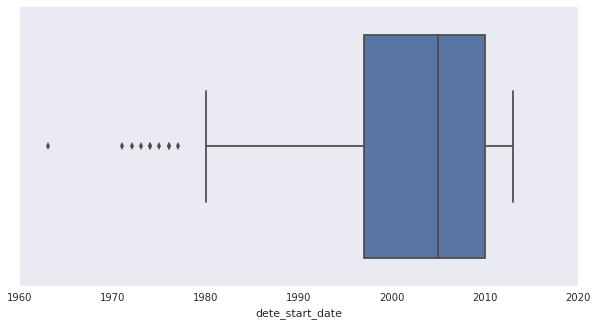

In [32]:
# Plotting the unique values of 'dete_start_date' on a boxplot 
fig = plt.figure(figsize=(10,5))
sns.set_style('dark')
sns.despine(left=True, bottom=True)
ax1 = sns.boxplot(dete_resignations['dete_start_date'])

The boxplot above shows us that there are some outliers in the dete_start_date column concentrated in the range 1960-1980. The majority of values lie in the first quartile. No values seem to be unreasonable for the purpose of our project.

Moving on to cease_date column in dete_resignations:

In [33]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

As we can see our cease_date data is inconsistent, therefore we have to extract only the years using vectorized string methods.

In [34]:
# Modifying strings to extract only the year in `cease_date`
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [35]:
# Converting the values to `float` 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

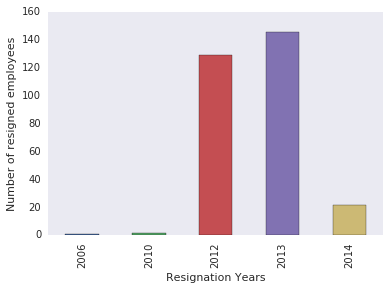

In [36]:
# Selecting the years and numbers 
dete_cease_dates = pd.DataFrame({"Years":['2006','2010','2012','2013','2014'] , "Nums":[1,2,129,146,22]})

# Plotting the results
ax2 = dete_cease_dates.plot.bar(x='Years', y='Nums', legend=False) 
ax2.set_xlabel('Resignation Years')
ax2.set_ylabel('Number of resigned employees')

We can observe that resignation of DETE ex-employees spans between 2006-2014

In [37]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

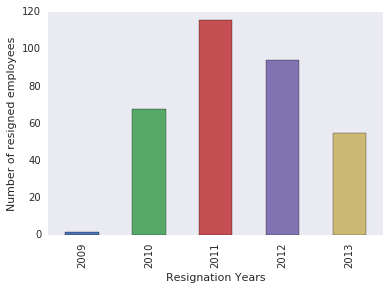

In [38]:
# Selecting the years and numbers 
tafe_cease_dates = pd.DataFrame({"Years":['2009','2010','2011','2012','2013'] , "Nums":[2,68,116,94,55]})

# Plotting the results 
ax3 = tafe_cease_dates.plot.bar(x='Years', y='Nums', legend=False) 
ax3.set_xlabel('Resignation Years')
ax3.set_ylabel('Number of resigned employees')

The bar plot for TAFE resignation years and number of employees shows us an increase in resigning employees from 2009 to 2011, and stable fall from 2011 to 2013. All values seem to be realistic, but year span is slighly different from DETE.

We will keep all years for our analysis.

## Creating a new column

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of   time resigning due to some kind of dissatisfaction? What about employees     who have been at the job longer?

Since we have both start and end dates of service in DETE dataframe, we can calculate the length and create a new column in dete_resignations called institute_service.

In [39]:
# Creating new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Checking unique values 
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

This new column institute_service makes it easier to understand the span of the length of time the DETE employee spent in their workplace. Majority of the employees have worked from less than a year up to 10 years. The smaller fraction of employees have spend 20-30 years in DETE. The longest period is 49 years.

## Identifying Dissatisfied Employees

In this step, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

* tafe_survey_updated:

* Contributing Factors. Dissatisfaction

* Contributing Factors. Job Dissatisfaction

* detesurveyupdated:

* job_dissatisfaction

* dissatisfaction_with_the_department

* physical_work_environment

* lack_of_recognition

* lack_of_job_security

* work_location

* employment_conditions

* work_life_balance

* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

These steps will help us identify dissatisfied employees in both TAFE and DETE:

1. Use Series.value_counts method to view the values in selected columns

2. Write a function that will update the values in selected columns

3. Use DataFrame.applymap() method to apply this function to all selected        columns

4. Create a dissatisfied column in both dataframes using DataFrame.any()        method

5. Use df.copy() method to create a copy of the results and avoid the            SettingWithCopy Warning.

In [40]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [41]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [42]:
# Creating a new function named `update_vals` 
def update_vals(val): 
    if pd.isnull(val):
        return np.nan
    elif val == '-': 
        return False 
    else: 
        return True

In [43]:
# Applying `update_vals` function to selected columns in TAFE dataframe 
cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Passing a fucntion to all values and creating a new column
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(axis=1, skipna=False)

# Creating a copy of the result
tafe_resignations_up = tafe_resignations.copy()

In [44]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [45]:
# Applying `update_vals` function to selected columns in DETE dataframe 

cols = ['job_dissatisfaction',
        'dissatisfaction_with_the_department',
        'physical_work_environment',
        'lack_of_recognition',
        'lack_of_job_security',
        'work_location',
        'employment_conditions',
        'work_life_balance',
        'workload']

# Passing a fucntion to all values and creating a new column
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
 
# Creating a copy of the result
dete_resignations_up = dete_resignations.copy()

In [46]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the data

First, let's add a column to each dataframe that will allow us to easily distinguish between the two


In [48]:
# Creating new Columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Combining the dataframes:

* We will combine the dataframes with pd.concat() function because our end     goal is to aggregate the data according to the institute_service column.

* We will use inner join, and axis=0 to make it easier for us to aggregate     the data.

In [49]:
# Combining the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, join='inner')

## Cleaning the Service column

This column is tricky to clean because it currently contains values in a couple different forms:

In [50]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, we'll convert these numbers into categories:

* New: Less than 3 years at a company

* Experienced: 3-6 years at a company

* Established: 7-10 years at a company

* Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above

In [51]:
# extract service years and convert to float
combined["institute_service_updated"] = combined["institute_service"].astype('str').str.extract(r'(\d+)', expand=False)
combined["institute_service_updated"] = combined["institute_service_updated"].astype('float')

#verify the changes and unique values
combined["institute_service_updated"].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_updated, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

In [52]:
# Create a function that maps each year value to one of the career stages 
def career_stage(val):
    if pd.isnull(val): 
        return np.nan
    elif val < 3:
        return 'New'
    elif val <= 6: 
        return 'Experienced'
    elif val <= 10: 
        return 'Established'
    else: 
        return 'Veteran'
    
# Applying the function and creating a new column 
combined['service_cat'] = combined['institute_service_updated'].apply(career_stage)

In [53]:
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

After categorizing the values in the institute_service column into career stages, we know exactly the number of employees who worked for the institutes for a short period of time and those who worked there longer, which would help us answer the question of our analysis and determine if they resigned due to some kind of dissatisfaction.

## Performing Initial Analysis

In [55]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
# Filling in the missing values with the most common value 'False'
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [57]:
combined['dissatisfied'].value_counts(dropna= False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [58]:
# Creating a pivot table to display dissatisfied employees by service_category
pv_service_cat_dissatisfied = combined.pivot_table(values='dissatisfied', index='service_cat')
pv_service_cat_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


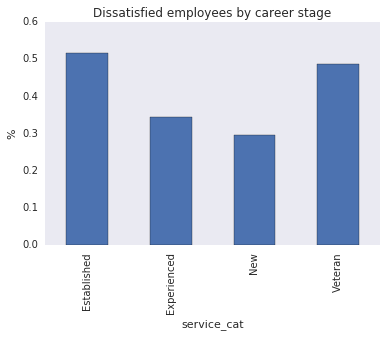

In [59]:
# Plotting the pivot table on a bar plot
ax4 = pv_service_cat_dissatisfied.plot(kind='bar', legend=False)
ax4.set_title('Dissatisfied employees by career stage')
ax4.set_ylabel('%')

Looking at this bar chart, we can make the following observations:

* Majority of employees who worked in the institutions for short period of     time resigned for reasons other than job dissatisfaction. Only 29.5% quit     because they were not satisfied.

* Approximately 50% of ex-employees belonging to Established and Veteran       categories who worked for the institutions the longest quit because they      were not satisfied with their job.

We can also figure out which job positions under those service categories were dissatisfied the most and the least:

In [60]:
# Identifying the unique values in `position` column
combined['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                       5
Executive (SES/SO)                                     

In [61]:
# Generating pivot table to represent dissatisfied employees by position held
pv_position_dissatisfied = combined.pivot_table(values='dissatisfied', index='position')
pv_position_dissatisfied = pv_position_dissatisfied.reindex(pv_position_dissatisfied['dissatisfied'].sort_values(ascending=False).index)
pv_position_dissatisfied

,dissatisfied
position,
Guidance Officer,1.000000
Other,0.666667
Public Servant,0.600000
Teacher,0.527132
Executive (SES/SO),0.500000
Head of Curriculum/Head of Special Education,0.500000
Cleaner,0.487179
Schools Officer,0.428571
Technical Officer (TO),0.400000


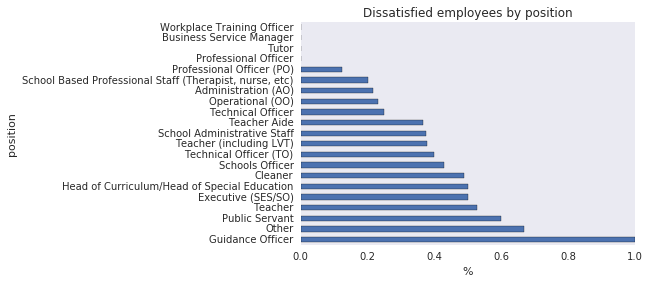

In [62]:
# Plotting the results on a horizontal bar plot
ax5 = pv_position_dissatisfied.plot(kind='barh', legend=False)
ax5.set_title('Dissatisfied employees by position')
ax5.set_xlabel('%')

Employees who held the Guidance Officer position resigned because they were all dissatified with their job, whereas employees with Workplace Training Officer, Business Service Manager, Professional Officer and Tutor positions were completely satisfied.

## Further Analysis

### Cleaning the Age column

First step is to clean the age column and standardize the format.

In [63]:
# Identifying the unique `age` values
combined['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

Now that we know all unique values, we can modify the values by changing the astype to str and use vectorized operations to change the strings.

After, we will divide the ages into the following age groups:

* 20s [20 or younger-25]

* 30s [26-35]

* 40s [36-45]

* 50s [46-55]

* 60s [56 or older]

To accomplish that, we will write a function age_group, and pass this function to the entire age column using apply() method.

We will split all strings and keep only the first number since the range of values fall into the same age category. For example, the values in range 21-25 fall into 20s category, the values in range 51-55 fall into 50s category and so on.

In [64]:
# Formatting object type to a str and using vectorized operations 
combined['age'] = combined['age'].astype(str).str.split('or').str.get(0).str.split('-').str.get(0).str.split(' ').str.get(0)

# Changing object type back to float
combined['age'] = combined['age'].astype(float)

combined['age'].value_counts(dropna=False).sort_index(ascending=True)

 20.0    10
 21.0    62
 26.0    67
 31.0    61
 36.0    73
 41.0    93
 46.0    81
 51.0    71
 56.0    55
 61.0    23
NaN      55
Name: age, dtype: int64

In [65]:
# Creating a new function to group `age` column
def age_group(val): 
    if pd.isnull(val):
        return np.nan
    elif val <= 25: 
        return '20s'
    elif val <= 35:
        return '30s'
    elif val <= 45:
        return '40s'
    elif val <= 55: 
        return '50s'
    elif val <= 65: 
        return '60s'

In [66]:
# Creating a new column and passing a function to all values in `age_groups`
combined['age_groups'] = combined['age'].apply(age_group)
combined['age_groups'].value_counts(dropna=False)

40s    166
50s    152
30s    128
60s     78
20s     72
NaN     55
Name: age_groups, dtype: int64

We can see that 55 values are missing. We will fill in the NaN values with the most common value in the age column - 40s

In [67]:
# Filling in the missing values with the most common value
combined['age_groups'] = combined['age_groups'].fillna('40s')
combined['age_groups'].value_counts(dropna=False)

40s    221
50s    152
30s    128
60s     78
20s     72
Name: age_groups, dtype: int64

## Dissatisfaction by Age
Now that we know how many people are in each age group, we will create a pivot table, where values - dissatisfied column, and index - age_groups column. Then, we will plot the pivot table.

In [69]:
# Generating a PV to represent dissatisfied employees by age 
pv_age_dissatisfied = combined.pivot_table(values='dissatisfied', index='age_groups')
pv_age_dissatisfied

,dissatisfied
age_groups,
20s,0.291667
30s,0.398438
40s,0.334842
50s,0.401316
60s,0.423077


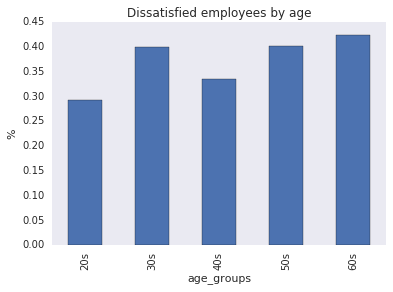

In [70]:
# Plotting the PV
ax5 = pv_age_dissatisfied.plot(kind='bar', legend=False)
ax5.set_title('Dissatisfied employees by age')
ax5.set_ylabel('%')

Looking at this bar chart, we can see that only about 29% of younger employees who were in their 20s resinged due to some kind of dissatisfaction. Whereas the number of people in their 30s, 50s, and 60s who were dissatisfied with their job is somewhat similar and account for 40%, 40%, and 42% respectively.

## TAFE & DETE separate analyses

* First step is to extract dissatisfied employees in each of the institutes.

* Then, create a pivot table representing dissatisfied employees in both DETE   and TAFE.

* Last step, to plot the results.

In [71]:
# Separating the DETE from `combined`
dete_only = combined[combined['institute'] == "DETE"]

# Checking the unique values in a `dissatisfied` column
dete_only['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [72]:
# Separating the TAFE from `combined`
tafe_only = combined[combined['institute'] == "TAFE"] 

# Checking the unique values in a `dissatisfied` column
tafe_only['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [73]:
# Creating a PV for dissatisfied employees from both institutes
pv_tafe_dete = combined.pivot_table(values='dissatisfied', index='institute')
pv_tafe_dete

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


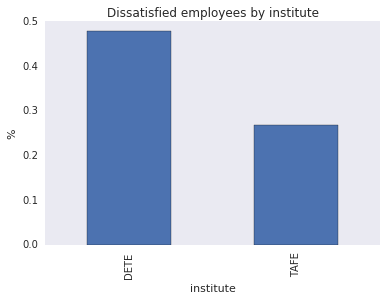

In [74]:
# Plotting the PV 
ax6 = pv_tafe_dete.plot(kind='bar', legend=False)
ax6.set_title('Dissatisfied employees by institute')
ax6.set_ylabel('%')

As we can see there were more employees in DETE(47.9%) who were dissatisfied with their job than in TAFE(26.7%).

## Conclusion

After cleaning the datasets, identifying the missing values, combining the datasets, and performing the initial analysis, we can finally summarize that approximately half of the ex-employees who worked for a long period of time in both DETE and TAFE resigned due to some kind of dissatisfaction. Whereas, the number of employees who worked for a short period of time is lower and accounts for 29.5%.

The number of younger employees(29%) resinging due to dissatisfaction is lower than that of older employees (40%-42%).